In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

from model import normalize, create_mask

2023-09-20 15:02:05.011569: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 15:02:05.115902: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 15:02:05.117577: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 15:02:14.522523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = tf.keras.models.load_model("coco_set_unet_semantic_segmentation_3_epochs_128_128.keras")

In [47]:
image = tf.image.decode_image(open("image-1-cro.jpg", "rb").read())

w, h, _ = image.shape

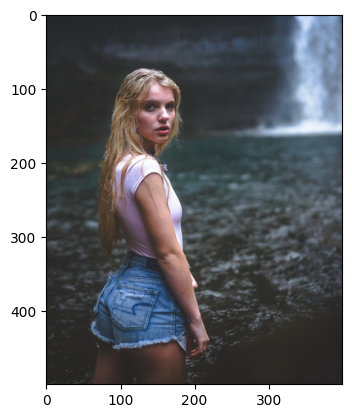

In [48]:
plt.imshow(image)

In [49]:
image = tf.image.resize(image, (128, 128))

image = normalize(image, 1)[0]

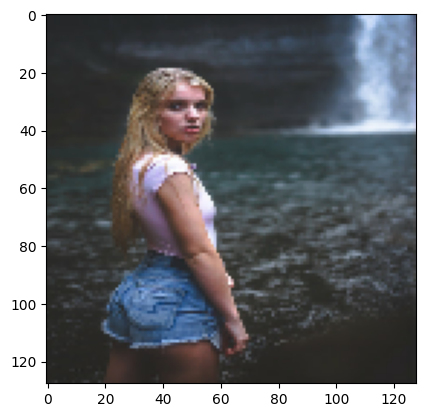

In [50]:
plt.imshow(image)

In [51]:
pred_img = create_mask(model.predict(tf.expand_dims(image, 0)))
pred_img = tf.cast(pred_img, tf.float32)

1/1 [==============================] - 0s 109ms/step


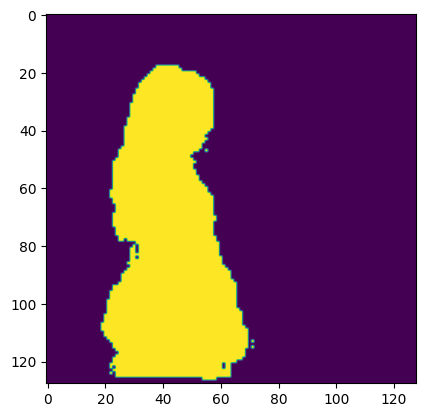

In [52]:
plt.imshow(pred_img)

In [53]:
masked_img =  image * pred_img
res_masked_img = tf.image.resize(masked_img, (w, h))


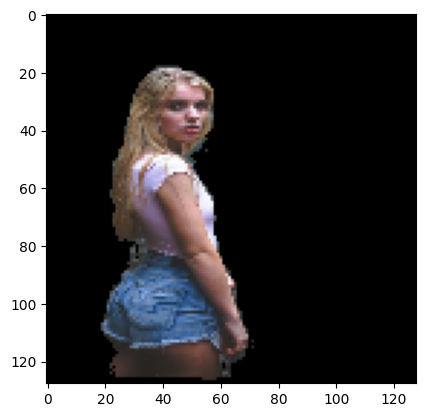

In [54]:
plt.imshow(masked_img)

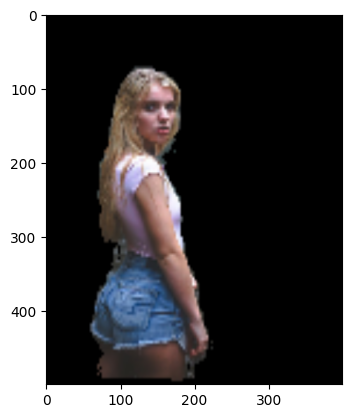

In [55]:
plt.imshow(res_masked_img)